# PyRAA Differential Corrections Tutorial 

Author: Drew Langford

This tutorial walks through the process of solving for periodic solutions in the CR3BP using a differential corrections procedure in PyRAA.

### Import standard libraries and pyraa

In [10]:
import numpy as np
import matplotlib.pyplot as plt

from pyraa import simulation
from pyraa import targeting

%matplotlib inline

### Create an initial guess based on Keplerian motion

In [2]:
x0 = 5
vy0 = -x0 + np.power(x0, -0.5)

S0 = np.array([x0, 0, 0, 0, vy0, 0])
T0 = 2*np.pi

### Initialize a Targeter based on perpendicular crossing

In [16]:
target = targeting.Targeter(
    Xd_vars = ['x', 'vy', 'T'], Xc_dict= {'y': 0, 'vx' : 0},
    dynamics= 'CR3BP', mu = 0.5, e = 0, eps = 1e-10)

S, T = target.solve(S_g = S0, T_g = T0)

Error: 2.5328869542420495e-13
--------------------------------------------------------------------------------
Solution Found in 5 iterations
S : [ 5.05839856  0.          0.          0.         -4.61246348  0.        ]
T : 6.891194607614599
--------------------------------------------------------------------------------



### Plot solution convergence and orbit

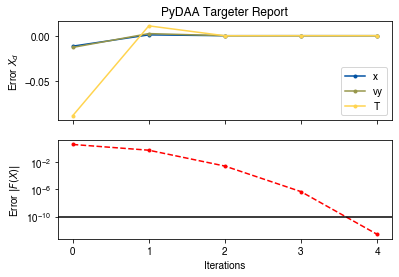

In [17]:
target.plot_convergence()
plt.show()

Propogating in series..
1 satellite propogated in series
Computaion time 1.038
Propogating Primaries..
Propogating Primaries and Lagrange Points
None


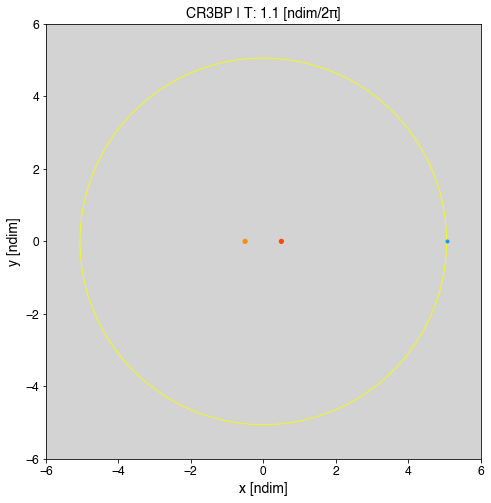

In [18]:
target.plot_sol(D2 = True, lims = [6, 6, 1])

### Verify orbit is periodic

In [22]:
sat = target.sats[0]
states = sat.get_states().T

np.isclose(states[0], states[-1])

array([ True,  True,  True,  True,  True,  True])